In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [2]:
df = pd.read_csv(r"C:\Users\Jayam\Documents\Wine.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df.shape

(178, 14)

In [5]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

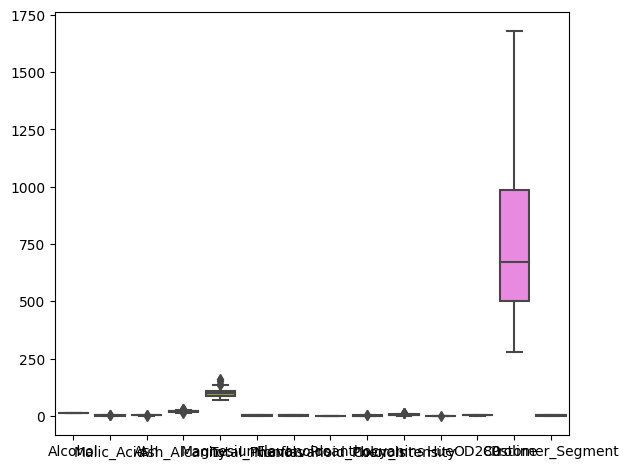

In [6]:
sns.boxplot(df)
plt.tight_layout()


In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


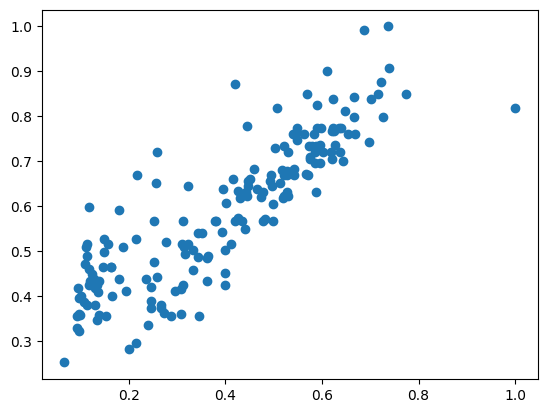

In [8]:
from sklearn import preprocessing
Input_Data = df.copy()
Flavanoids = Input_Data['Flavanoids'].to_list()
Total_Phenols = Input_Data['Total_Phenols'].to_list()
Flavanoids_Normalized = preprocessing.normalize([Flavanoids],norm='max')[0]
Total_Phenols_Normalized = preprocessing.normalize([Total_Phenols],norm='max')[0]
FlavanoidsMean = np.array(Flavanoids_Normalized).mean()
Total_PhenolsMean = np.array(Total_Phenols_Normalized).mean()                                                             
plt.scatter(Flavanoids_Normalized,Total_Phenols_Normalized,marker='o')

In [9]:
#Calculate iqr
df_iqr=df
Q1= df_iqr.quantile(0.25)
Q3=df_iqr.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Alcohol                   1.3150
Malic_Acid                1.4800
Ash                       0.3475
Ash_Alcanity              4.3000
Magnesium                19.0000
Total_Phenols             1.0575
Flavanoids                1.6700
Nonflavanoid_Phenols      0.1675
Proanthocyanins           0.7000
Color_Intensity           2.9800
Hue                       0.3375
OD280                     1.2325
Proline                 484.5000
Customer_Segment          2.0000
dtype: float64


In [10]:
df_out= df_iqr[~((df_iqr < (Q1-1.5*IQR)) | (df_iqr > (Q3+1.5*IQR))).any(axis=1)]

print('before filtering: ',df_iqr.shape)
print('after filtering: ',df_out.shape)

before filtering:  (178, 14)
after filtering:  (161, 14)


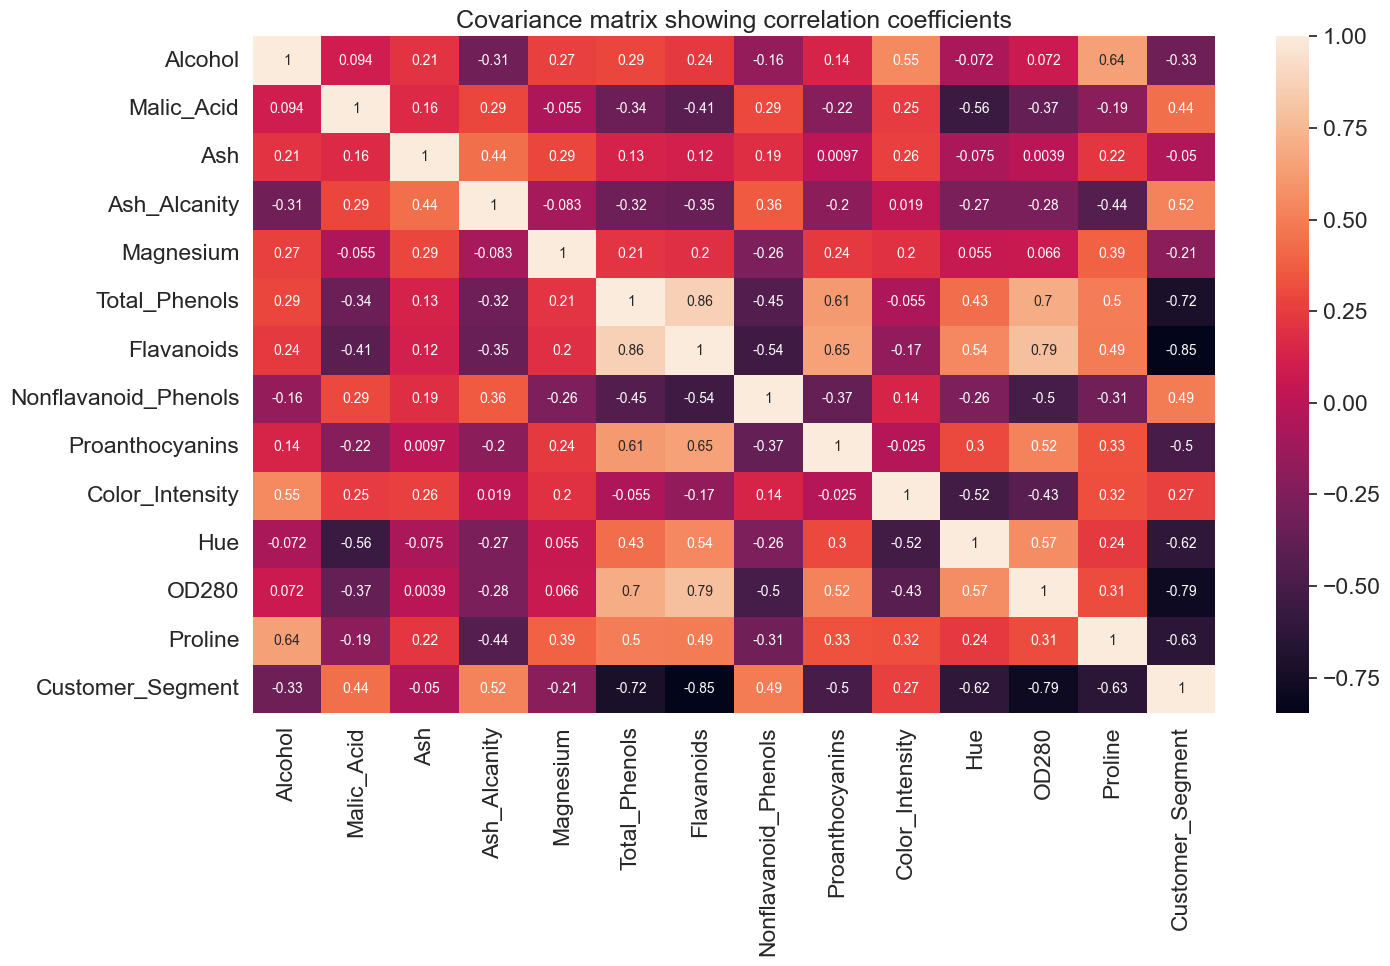

In [11]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(pd.DataFrame(df).corr(),annot=True,annot_kws={"size":10})
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()


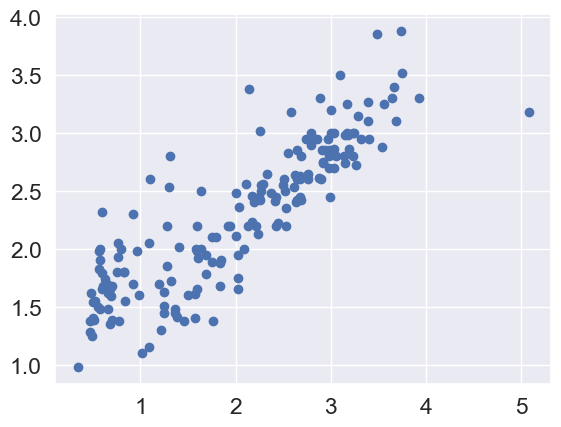

In [12]:
                                                       
plt.scatter(Flavanoids,Total_Phenols,marker='o')

In [13]:
#sns.pairplot(df)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df_out.drop(['Customer_Segment'],axis=1)
y= df_out['Customer_Segment']
x =scaler.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.3,random_state= 100)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,20)}

knn_gscv = GridSearchCV(knn,param_grid,cv=5)

knn_gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [17]:
knn_gscv.best_params_

{'n_neighbors': 11}

In [18]:
knn_gscv.best_score_

0.9735177865612649

SVM

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [20]:
from sklearn.svm import SVC

In [21]:
svm = SVC(random_state=0,kernel='linear',probability=True)
svm.fit(x_train,y_train)
svm_y_pred = svm.predict(x_test)
svm_score = svm.score(x_test,y_test)
svm_score

0.9795918367346939

In [22]:
svm_score_accurarcy = accuracy_score(y_test,svm_y_pred)
svm_score_accurarcy

0.9795918367346939

NAIVE

In [23]:
np.isfinite(df).sum()

Alcohol                 178
Malic_Acid              178
Ash                     178
Ash_Alcanity            178
Magnesium               178
Total_Phenols           178
Flavanoids              178
Nonflavanoid_Phenols    178
Proanthocyanins         178
Color_Intensity         178
Hue                     178
OD280                   178
Proline                 178
Customer_Segment        178
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split as tts
x = df_out.drop(['Customer_Segment'],axis=1)
y= df_out['Customer_Segment']
X_train,X_test,Y_train,Y_test = tts(x,y,test_size = 0.3,random_state=30)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [26]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_train,Y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [27]:
sel.get_support().sum()

5

In [28]:
selected_feat =X_train.columns[(sel.get_support())]
len(selected_feat)

5

In [29]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [30]:
model.fit(X_train,Y_train)

GaussianNB()

In [31]:
y_pred_naive =model.predict(X_test)

In [32]:
accuracy_score(Y_test,y_pred_naive)

0.9591836734693877

In [33]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
estimators = []
result =0
from sklearn.model_selection import StratifiedKFold
estimators.append(('standardize',StandardScaler()))
estimators.append(('naive_bayes',BernoulliNB()))
model = Pipeline(estimators)
seed = 1
param_grid = [{'naive_bayes__alpha':[0.0001,0.00001,0.001,0.003,0.01,0.03,0.1,0.3,1]}]
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
grid = GridSearchCV(model,param_grid,cv=kfold,scoring = 'accuracy')
grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(accuracy_score(Y_test,grid.predict(X_test)))

0.9458498023715414
{'naive_bayes__alpha': 0.03}
Pipeline(steps=[('standardize', StandardScaler()),
                ('naive_bayes', BernoulliNB(alpha=0.03))])
0.9591836734693877


In [34]:
model = BernoulliNB(alpha=0.0001)
model.fit(X_train,Y_train)
Y_pred =model.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.32653061224489793

In [35]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,Y_train)

MultinomialNB()

In [36]:
y_pred = clf.predict(X_test)
accuracy_score(Y_test,y_pred)

0.6938775510204082

PCA

In [37]:

from sklearn.decomposition import PCA
pca=PCA().fit(x)

In [38]:
principalComponents= pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,columns=['Component_'+str(i) for i in range(1,14)])

In [39]:
principalDf

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13
0,306.349435,23.161743,-2.954999,-0.486525,-0.557004,0.379088,0.456247,-0.393013,-0.730730,0.098449,-0.000609,-0.005019,0.079342
1,290.903293,-3.650510,-6.644760,0.986146,1.052591,-0.239904,-0.146386,-0.522616,0.172091,-0.134302,0.034452,-0.077739,-0.010059
2,425.869020,-4.828941,1.131349,-0.832375,-0.443343,0.697864,-0.731313,0.400632,-0.493047,0.021728,0.198335,-0.042142,-0.004188
3,721.043044,2.166673,0.893167,0.350185,-0.972542,0.532079,-0.098672,-0.238993,0.255906,0.423612,-0.150311,-0.136210,0.009814
4,-23.782220,19.854712,0.757631,-1.965808,-0.438842,0.761034,0.074917,0.134791,0.120527,0.065406,0.267749,-0.003091,0.052378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-99.218353,-5.614389,2.113056,4.996434,-0.864287,-0.541341,0.772220,-0.126477,-0.203189,0.182374,0.195719,-0.081608,-0.051896
157,-9.066398,3.783569,4.584980,1.443507,0.661416,0.332321,0.021652,0.283426,-0.059197,0.232709,-0.087003,0.046810,-0.044054
158,76.247942,20.383131,2.594822,4.224439,0.593907,0.185907,-0.709376,-0.141384,-0.308710,-0.006119,-0.244904,0.141579,0.027520
159,81.245892,20.243173,2.124819,3.069452,-0.066781,-1.048228,-0.437616,-0.041885,-0.449719,0.221495,-0.103303,0.003658,0.125451


In [40]:
features=x.T
cov_matrix=np.cov(features)
cov_matrix[:5]

array([[ 6.36549860e-01,  7.32868129e-02,  4.26706405e-02,
        -8.67205862e-01,  4.13104969e+00,  1.72097985e-01,
         2.51341079e-01, -1.76580512e-02,  9.97219720e-02,
         9.28717816e-01,  5.05960404e-04,  6.71629425e-02,
         1.70893958e+02],
       [ 7.32868129e-02,  1.09885553e+00,  4.47273680e-02,
         9.62152950e-01,  2.76452640e-01, -2.42513812e-01,
        -4.70601048e-01,  3.80221856e-02, -1.34180512e-01,
         6.34713264e-01, -1.33105976e-01, -2.92055637e-01,
        -6.26150811e+01],
       [ 4.26706405e-02,  4.47273680e-02,  5.81797205e-02,
         2.24505512e-01,  1.24541809e+00,  1.71006405e-02,
         1.22230745e-02,  2.55742236e-03,  4.12387811e-03,
         1.01844966e-01, -2.08641227e-03, -4.06984084e-03,
         2.10711922e+01],
       [-8.67205862e-01,  9.62152950e-01,  2.24505512e-01,
         9.08845031e+00, -6.97111025e+00, -8.79918362e-01,
        -1.52799189e+00,  1.24779309e-01, -5.33187422e-01,
        -4.47735250e-01, -2.14344682e

In [41]:
values,vectors = np.linalg.eig(cov_matrix)
values[:5]

array([1.04923867e+05, 1.22413652e+02, 7.40641499e+00, 3.98678593e+00,
       9.69590408e-01])

In [42]:
vectors[:5]

array([[ 1.62922553e-03, -1.00305315e-02,  9.06924693e-03,
         1.30316294e-01, -6.58417446e-02,  2.32569102e-01,
        -9.49501073e-01, -1.29090477e-01,  4.88012494e-02,
        -5.52243223e-02, -1.34569934e-02,  2.40054551e-02,
        -1.82877001e-03],
       [-5.96668515e-04, -1.14575498e-02,  1.43991536e-01,
         1.93929605e-01,  5.69846651e-01,  7.59580715e-01,
         1.66972480e-01, -1.91130921e-03, -6.35800042e-02,
         5.74794011e-02, -1.98804114e-02, -6.42095252e-02,
        -9.49687817e-03],
       [ 2.00987371e-04, -7.27496621e-03,  4.14448823e-02,
        -1.94303235e-02, -5.63806518e-03,  3.90191942e-02,
        -9.51570418e-04, -8.10180982e-03, -8.17428709e-02,
        -4.30138789e-02,  9.62595525e-01,  2.08832901e-01,
        -1.32278394e-01],
       [-4.58535471e-03, -1.13232198e-02,  9.28564774e-01,
        -3.40530184e-01, -1.35931323e-01,  1.50040835e-02,
        -2.49715455e-02, -1.25158455e-03, -4.27044755e-03,
         1.11004116e-02, -4.54682851e

In [43]:
P1= x.dot(vectors.T[0])

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:

print ('KNN =',knn_gscv.best_score_)
print ('naive for gaussian =',accuracy_score(Y_test,y_pred_naive))
print ('naive for Bernoulli =',accuracy_score(Y_test,y_pred))
print('pca =',P1)
print('svm  =',svm_score_accurarcy)

KNN = 0.9735177865612649
naive for gaussian = 0.9591836734693877
naive for Bernoulli = 0.6938775510204082
pca = 0      1066.976816
1      1051.530674
2      1186.496401
3      1481.670425
4       736.845161
          ...     
172     661.409028
174     751.560983
175     836.875323
176     841.873274
177     561.488654
Length: 161, dtype: float64
svm  = 0.9795918367346939
